<Axes.ArtistList of 0 artists>
PathPatch6((-0.075, 42.1068) ...)
PathPatch6((0.925, 46.1441) ...)
PathPatch6((1.925, 51.9802) ...)
PathPatch6((2.925, 54.4029) ...)


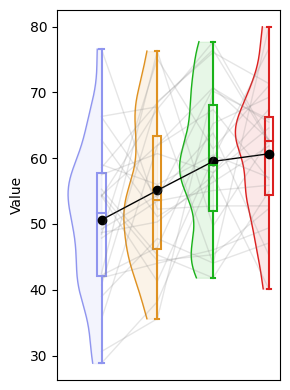

In [52]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Generate test data with specified effects
n_subjects = 24
# np.random.seed(0)
# base_values = np.random.randn(n_subjects) * 10 + 50  # Base value for each subject
effects = np.array([0, 5, 10, 10])  # Specified effects for each condition

n_conds = 4 # TODO remove hardcoding

# Wide format data
data_wide = pd.DataFrame({
    'Subject': np.arange(n_subjects),
    'Cond1': np.random.randn(n_subjects) * 10 + 50 + effects[0],
    'Cond2': np.random.randn(n_subjects) * 10 + 50 + effects[1],
    'Cond3': np.random.randn(n_subjects) * 10 + 50 + effects[2],
    'Cond4': np.random.randn(n_subjects) * 10 + 50 + effects[3],
})

# Melt to long format for easier plotting
df = pd.melt(data_wide, id_vars=['Subject'], var_name='Condition', value_name='Value')
df['Condition'] = df['Condition'].str.replace('Cond', '').astype(int) - 1  # Convert to numeric conditions

# Setup the plot
plt.figure(figsize=(3, 4)) # (3, 4)

# Custom colors
colors = ['#8f95ef', '#df9120', '#19b219', '#dc2020']

# Plot half-violin plots to the left side
bandwidth = 0.35
for condition in range(4):
    data = df[df['Condition'] == condition]['Value']
    kde = gaussian_kde(data, bw_method=bandwidth)
    min_value, max_value = data.min(), data.max()
    y = np.linspace(min_value, max_value, 300)
    kde_values = kde(y)
    kde_values = kde_values / max(kde_values) * 0.6
    plt.fill_betweenx(y, condition - kde_values, condition, color=colors[condition], alpha=0.1)
    plt.plot(condition - kde_values, y, color=colors[condition], linewidth=1)

boxplot = sns.boxplot(
    x='Condition', 
    y='Value', 
    data=df,
    showcaps=True,
    boxprops={'facecolor':'None', 'linewidth':1.5},
    showfliers=False,
    whiskerprops={'linewidth':1.5},
    medianprops={'color': 'black'}, # 'k'
    width=0.15, 
    zorder=10
    )

colors = []
for violin_ind in range(n_conds):
    line = boxplot.lines[violin_ind]
    colors.append(line.get_color())

for i in range(n_conds):
    boxplot.lines[n_conds + 5 * i + 0].set_color(colors[i])  # lower whisker
    boxplot.lines[n_conds + 5 * i + 1].set_color(colors[i])  # upper whisker
    boxplot.lines[n_conds + 5 * i + 2].set_color(colors[i])  # lower whisker end
    boxplot.lines[n_conds + 5 * i + 3].set_color(colors[i])  # upper whisker end
    boxplot.lines[n_conds + 5 * i + 4].set_color(colors[i])  # boxplot median

print(boxplot.artists)
for i, box in enumerate(boxplot.patches):
    print(box)
    box.set_edgecolor(colors[i])  # Set edge color for boxes
    box.set_facecolor('none')  # Ensure the facecolor is set to 'none'
    box.set_linewidth(1.5)  # Optional: set the line width for the boxes

# for line in boxplot.lines:
#     print(line)

# Plot means
means = df.groupby('Condition')['Value'].mean()
plt.plot(means.index, means, color='black', marker='o', linestyle='-', linewidth=1)

# Plot connected lines for each subject without circles
for subject in df['Subject'].unique():
    sub_df = df[df['Subject'] == subject]
    plt.plot(sub_df['Condition'], sub_df['Value'], color='grey', alpha=0.2, linestyle='-', linewidth=1, marker='', markersize=5)

# Add legend and remove x-axis labels
plt.xticks([])
# plt.legend(['Cond1', 'Cond2', 'Cond3', 'Cond4'], facecolor='white', framealpha=1, loc='upper right')

plt.xlim([-0.8, 3.2])

plt.ylabel('Value')
plt.xlabel('')
plt.tight_layout()
plt.show()